In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/Harvey/Downloads/Harmful Algae Blooms in Bolinao (from HABhub) - Sheet1.csv")

# Modify the original DataFrame to keep only the specified columns
df = df.loc[:, ["dissolved oxygen", "ph", "water temp", "chlorophyll-a"]]

# Split the DataFrame into train (80%) and test (20%) sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [35]:
display(df_train.head(3))
display(df_test.head(3))

,dissolved oxygen,ph,water temp,chlorophyll-a
1352,-2.6848,6.9140,30.6774,4.6948
141,0.3344,7.5692,29.8578,3.4848
2,-0.9472,7.5881,28.7926,2.6257


,dissolved oxygen,ph,water temp,chlorophyll-a
1118,-1.1248,6.9518,29.1989,1.7545
1653,-2.0992,6.8951,30.7062,2.2143
1864,1.0065,0.3600,30.9297,1.8271


In [36]:
print(df_train.shape)
print(df_test.shape)

(1543, 4)
(386, 4)


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 1352 to 1126
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dissolved oxygen  1543 non-null   float64
 1   ph                1543 non-null   float64
 2   water temp        1543 non-null   float64
 3   chlorophyll-a     1543 non-null   float64
dtypes: float64(4)
memory usage: 60.3 KB


In [38]:
df_train.describe()

,dissolved oxygen,ph,water temp,chlorophyll-a
count,1543.000000,1543.000000,1543.000000,1543.000000
mean,0.057605,6.406682,30.509412,5.162779
std,3.523141,1.921613,1.108091,4.798533
min,-2.699200,-0.270000,27.343200,0.701800
25%,-1.751200,6.813200,29.792450,2.420000
50%,-0.779200,6.895100,30.508000,3.678400
75%,0.724550,6.995900,31.282550,6.037900
max,24.888000,8.060600,33.958300,41.829700


In [39]:
df_train.describe().columns

Index(['dissolved oxygen', 'ph', 'water temp', 'chlorophyll-a'], dtype='object')

In [40]:
df_train.columns

Index(['dissolved oxygen', 'ph', 'water temp', 'chlorophyll-a'], dtype='object')

In [41]:
df_train_n = []
df_train_c = []

for column in df_train.describe().columns:
    df_train_n.append(column)

for column in df_train.columns:
    if column not in df_train_n:
        df_train_c.append(column)

df_train_num = df_train[df_train_n]
df_train_cat = df_train[df_train_c]


In [42]:
df_train_num

,dissolved oxygen,ph,water temp,chlorophyll-a
1352,-2.6848,6.9140,30.6774,4.6948
141,0.3344,7.5692,29.8578,3.4848
2,-0.9472,7.5881,28.7926,2.6257
1190,-0.7552,6.8762,30.2540,2.9645
1803,1.1163,-0.2700,32.4355,1.6214
...,...,...,...,...
1130,-1.3408,6.9896,29.6580,2.9282
1294,0.2960,6.8825,31.8933,7.3689
860,-1.2544,6.8069,30.6729,4.5980
1459,-2.6992,6.7754,29.7998,1.6335


In [43]:
df_train_cat

""
1352
141
2
1190
1803
...
1130
1294
860
1459


1352   -2.6848
141     0.3344
2      -0.9472
1190   -0.7552
1803    1.1163
         ...  
1130   -1.3408
1294    0.2960
860    -1.2544
1459   -2.6992
1126   -0.9040
Name: dissolved oxygen, Length: 1543, dtype: float64


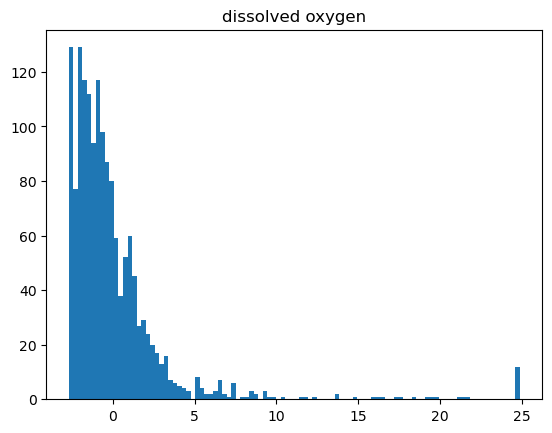

1352    6.9140
141     7.5692
2       7.5881
1190    6.8762
1803   -0.2700
         ...  
1130    6.9896
1294    6.8825
860     6.8069
1459    6.7754
1126    6.8951
Name: ph, Length: 1543, dtype: float64


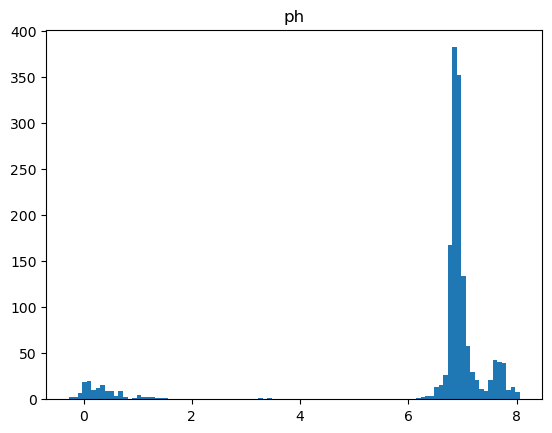

1352    30.6774
141     29.8578
2       28.7926
1190    30.2540
1803    32.4355
         ...   
1130    29.6580
1294    31.8933
860     30.6729
1459    29.7998
1126    30.2699
Name: water temp, Length: 1543, dtype: float64


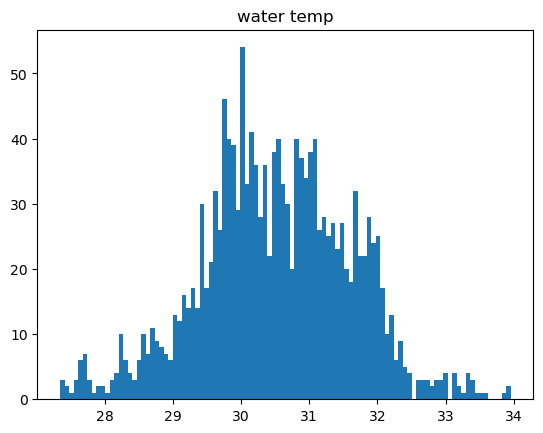

1352    4.6948
141     3.4848
2       2.6257
1190    2.9645
1803    1.6214
         ...  
1130    2.9282
1294    7.3689
860     4.5980
1459    1.6335
1126    5.6628
Name: chlorophyll-a, Length: 1543, dtype: float64


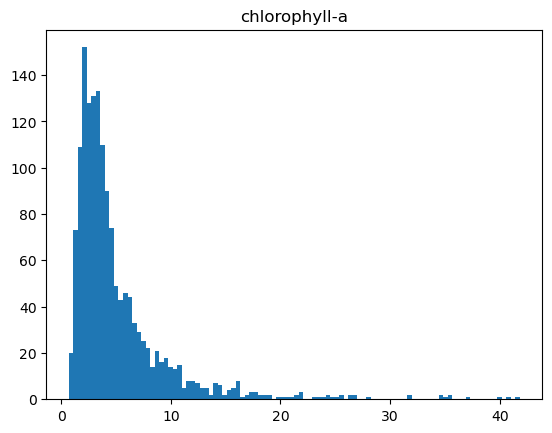

In [44]:
#distributions for all numeric variables 
for i in df_train_num.columns:
    print(df_train_num[i])
    plt.hist(df_train_num[i], bins=100)
    plt.title(i)
    plt.show()

                  dissolved oxygen        ph  water temp  chlorophyll-a
dissolved oxygen          1.000000 -0.529603    0.249336      -0.032584
ph                       -0.529603  1.000000   -0.384802       0.147576
water temp                0.249336 -0.384802    1.000000       0.336780
chlorophyll-a            -0.032584  0.147576    0.336780       1.000000


<Axes: >

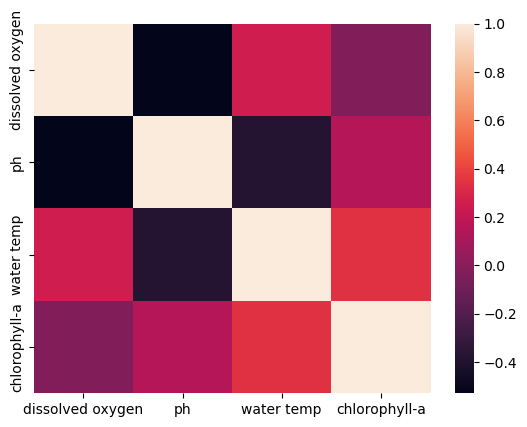

In [45]:
print(df_train_num.corr())
sns.heatmap(df_train_num.corr())

In [46]:
df_train_features = df_train.drop(columns=['chlorophyll-a'])
df_train_target = df_train.drop(columns=['ph', 'dissolved oxygen', 'water temp'])

print(df_train_features.shape)
print(df_train_target.shape)

(1543, 3)
(1543, 1)


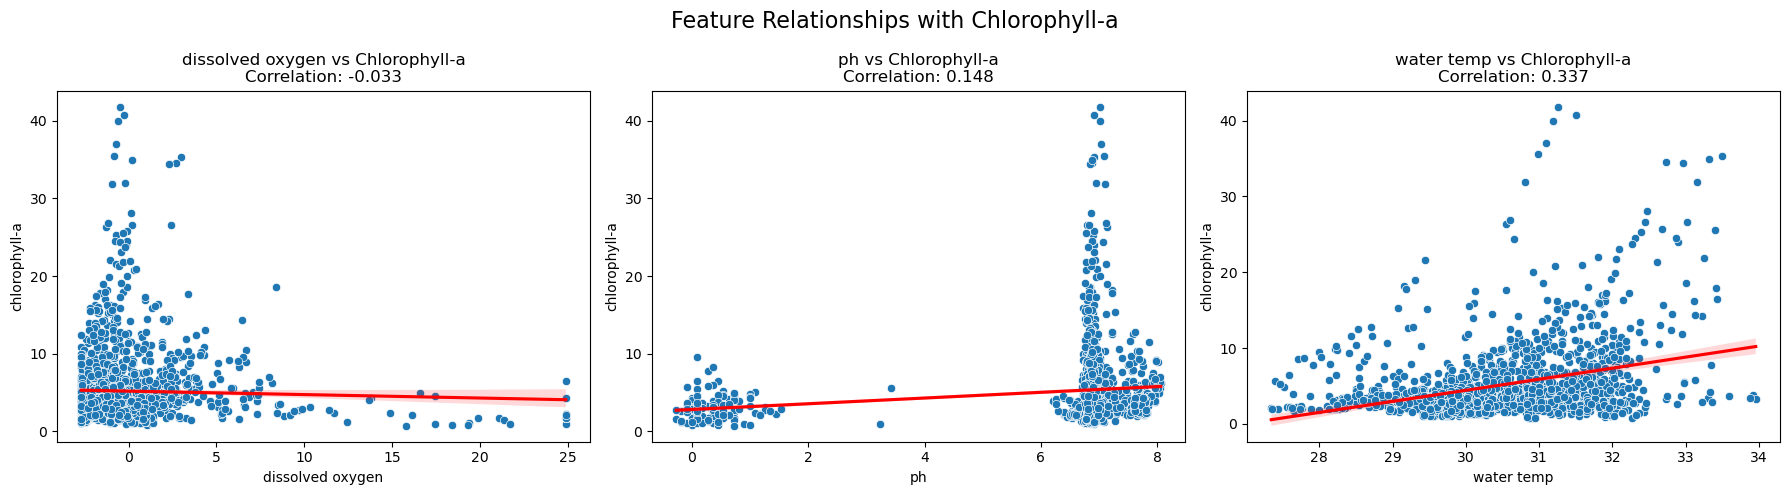

In [47]:
# First, let's combine the features and target into one DataFrame for easier plotting
# This assumes the target column is 'chlorophyll-a' based on your code
features = df_train_features.columns
target = 'chlorophyll-a'  # Adjust if your target column has a different name

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature Relationships with Chlorophyll-a', fontsize=16)

# Plot each feature against the target
for i, feature in enumerate(features):
    sns.scatterplot(
        x=df_train_features[feature], 
        y=df_train_target.iloc[:, 0],  # First column of target DataFrame
        ax=axes[i]
    )
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Chlorophyll-a')
    
    # Add a regression line to see the trend
    sns.regplot(
        x=df_train_features[feature], 
        y=df_train_target.iloc[:, 0],
        scatter=False,
        ax=axes[i],
        color='red'
    )
    
    # Calculate correlation coefficient
    corr = df_train_features[feature].corr(df_train_target.iloc[:, 0])
    axes[i].set_title(f'{feature} vs Chlorophyll-a\nCorrelation: {corr:.3f}')

plt.tight_layout()
plt.show()